In [19]:
import sys, os; sys.path.append(os.path.abspath("..")) # call Py module from parent dir
from fetch_data import FetchData
import pandas as pd
import pdb
%matplotlib inline

# Heat categorization

##### Assumptions
- SHU is more reliable and more standard than JRP

##### Questions
- What are the cutoff scores for each category?
- Why is there no regular "hot?" Should there be?

#### Load data

In [2]:
fetcher = FetchData()
data = fetcher.data

122 peppers fetched!


In [3]:
data.head()

,name,species,heat,region,origin,min_shu,max_shu,min_jrp,max_jrp,link
0,Bell Pepper,annuum,mild,Multi-Region,"Mexico, South America",0.0,0,-8000,-2500,http://www.pepperscale.com/bell-pepper
1,Gypsy Pepper,annuum,mild,North America,United States,0.0,0,-8000,-2500,http://www.pepperscale.com/gypsy-pepper
2,Purple Beauty Pepper,annuum,mild,South America,South America,0.0,0,-8000,-2500,http://www.pepperscale.com/purple-beauty-pepper
3,Melrose Pepper,annuum,mild,North America,United States,0.0,0,-8000,-2500,http://www.pepperscale.com/melrose-pepper
4,Banana Pepper,annuum,mild,South America,South America,0.0,500,-8000,-5,http://www.pepperscale.com/banana-pepper


## Finding natural categories

Min & max: [0.0, 16000000]


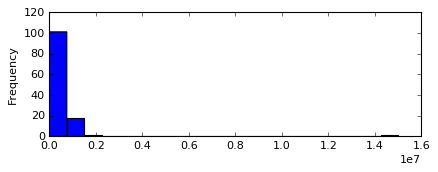

In [44]:
# super skewed distribution
print "Min & max:", [data["min_shu"].min(), data["max_shu"].max()]
data["min_shu"].plot.hist(bins=20, figsize=(6, 2))

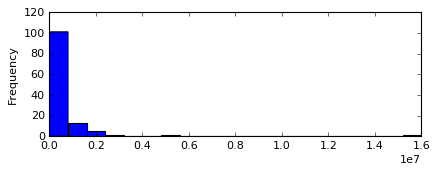

In [45]:
data["max_shu"].plot.hist(bins=20, figsize=(6, 2))

In [15]:
# in what SHU range do 75% of records fall?
    # using min SHU as basis

data["min_shu"].describe()

count    1.210000e+02
mean     3.168556e+05
std      1.402494e+06
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+04
75%      1.000000e+05
max      1.500000e+07
Name: min_shu, dtype: float64

In [46]:
min_shu_75 = data["min_shu"].describe()["75%"]
data[data["min_shu"] <= min_shu_75][["min_shu", "max_shu"]].shape

(94, 2)

In [54]:
pd.qcut(data["min_shu"], 5).value_counts()

(500, 5000]           30
[0, 500]              26
(125000, 15000000]    24
(30000, 125000]       21
(5000, 30000]         20
Name: min_shu, dtype: int64

#### SHU

In [58]:
data.sort_values("max_shu", ascending=False)

,name,species,heat,region,origin,min_shu,max_shu,min_jrp,max_jrp,link
120,Pure Capsaicin,None,super hot,Multi-Region,None,15000000.0,16000000,1875,6400,http://www.pepperscale.com/capsaicin
119,Pepper Spray,None,super hot,Multi-Region,None,2000000.0,5300000,250,2120,http://www.pepperscale.com/pepper-spray
121,Dragon’s Breath Pepper,chinense,super hot,Europe,United Kingdom,NaN,2480000,310,992,https://www.pepperscale.com/dragons-breath-pep...
118,Komodo Dragon Pepper,chinense,super hot,Europe,United Kingdom,1400000.0,2200000,175,880,https://www.pepperscale.com/komodo-dragon-pepper/
117,Carolina Reaper,chinense,super hot,North America,United States,1400000.0,2200000,175,880,http://www.pepperscale.com/carolina-reaper
115,Trinidad Moruga Scorpion,chinense,super hot,Central America and the Caribbean,Trinidad,1200000.0,2000000,150,800,http://www.pepperscale.com/trinidad-moruga-sco...
116,Trinidad Scorpion Chocolate,chinense,super hot,Central America and the Caribbean,Trinidad,1200000.0,2000000,150,800,http://www.pepperscale.com/trinidad-scorpion-c...
108,7 Pot Douglah,chinense,super hot,Central America and the Caribbean,Trinidad,923889.0,1853986,109,742,https://www.pepperscale.com/7-pot-douglah/
110,Dorset Naga,chinense,super hot,Europe,United Kingdom,1000000.0,1598227,125,639,http://www.pepperscale.com/dorset-naga
109,Naga Morich,chinense,super hot,Asia,India,1000000.0,1500000,125,600,http://www.pepperscale.com/naga-morich


In [57]:
# min SHU always less than or equal to max SHU, except when there is no recorded min_shu
data[~(data["min_shu"] <= data["max_shu"])]

,name,species,heat,region,origin,min_shu,max_shu,min_jrp,max_jrp,link
121,Dragon’s Breath Pepper,chinense,super hot,Europe,United Kingdom,NaN,2480000,310,992,https://www.pepperscale.com/dragons-breath-pep...


In [12]:
def find_shu_range(heat):
    heat_data = data[data["heat"] == heat]
    output = pd.Series()
    output["min_shu"] = heat_data["min_shu"].min()
    output["max_shu"] = heat_data["max_shu"].max()
    return output

for heat in data["heat"].unique():
    print "{}:".format(heat), find_shu_range(heat).values

mild: [    0.  4000.]
medium: [    500.  100000.]
extra hot: [  50000.  400000.]
super hot: [   300000.  16000000.]
